This notebook intends to solve questions for a post-interview test conducted by elio GmBH.
The 'Sale Report' is the dataset, which was used to do the analysis
The Questions are answered sequentially as:
1. Get the top 10 sold products including their sold quantity
2. Get the top 10 returned products including their return quantity
3. Get the top 10 most returned products in percent
4. What color is the most sold color

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
#Reading all the excel sheets

file = pd.ExcelFile('/content/drive/MyDrive/Sale Report.xlsx')
master = pd.read_excel(file,'Master')
sale = pd.read_excel(file, 'Sale')
returns = pd.read_excel(file, 'Return')

In [4]:
#Summary of master sheet

master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9235 entries, 0 to 9234
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SKU Code    9173 non-null   object
 1   Design No.  9235 non-null   object
 2   Stock       9235 non-null   int64 
 3   Category    9226 non-null   object
 4   Size        9235 non-null   object
 5   Color       9226 non-null   object
dtypes: int64(1), object(5)
memory usage: 433.0+ KB


In [5]:
#Summary of Sale sheet

sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248520 entries, 0 to 248519
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date               248520 non-null  datetime64[ns]
 1   Order ID           248520 non-null  object        
 2   Portal             248520 non-null  object        
 3   Style              248520 non-null  object        
 4   SKU                248520 non-null  object        
 5   Qty                248520 non-null  int64         
 6   Unit Price         248520 non-null  float64       
 7   City               248519 non-null  object        
 8   Shipping Provider  248085 non-null  object        
 9   Sales              248520 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 19.0+ MB


In [6]:
#Summary of returns sheet

returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54700 entries, 0 to 54699
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      54700 non-null  datetime64[ns]
 1   Order ID  54700 non-null  object        
 2   Portal    54700 non-null  object        
 3   Style     54700 non-null  object        
 4   SKU       54700 non-null  object        
 5   Qty       54700 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.5+ MB


#1. Get the top 10 sold products including their sold quantity

In [8]:
# A sneak-peak in to the Sales sheet
sale.head()

#We assume 'Style' defines a product and it can be used as a parameter to group sales and return products

,Date,Order ID,Portal,Style,SKU,Qty,Unit Price,City,Shipping Provider,Sales
0,2022-04-01,51960721729,Snapdel TBS,JNE2305,JNE2305-KR-533-XL,1,438.10,Tura,DELHIVERY_ESSENTIAL,438.10
1,2022-04-01,51961645447,Snapdel TBS,JNE2305,JNE2305-KR-533-XXL,1,438.10,Faridabad,LOGIX_FOX_LAAP,438.10
2,2022-04-01,51961011403,Snapdel TBS,BL099,BL099-L,1,318.10,Amroha,EKART,318.10
3,2022-04-01,51961082119,Snapdel TBS,SET156,SET156-KR-NP-XXXL,1,1000.95,Jaipur,ONEWORLD_LAAP,1000.95
4,2022-04-01,51961718111,Snapdel TBS,SET318,SET318-KR-SHA-M,1,1146.43,Nagpur,ELASTIC_RUN_LAAP,1146.43


In [9]:
#Get the top 10 most most sold product
top10_sales = sale.groupby(['Style'])[['Qty']].sum().sort_values(['Qty'],ascending=False).head(10)

In [10]:
top10_sales

,Qty
Style,
J0341,8522
JNE3797,7078
JNE3800,3074
J0340,2804
SET268,2720
J0344,2718
JNE3798,2478
JNE1408,2393
JNE3697,2251


<Axes: title={'center': 'Top 10 sold products'}, xlabel='Style'>

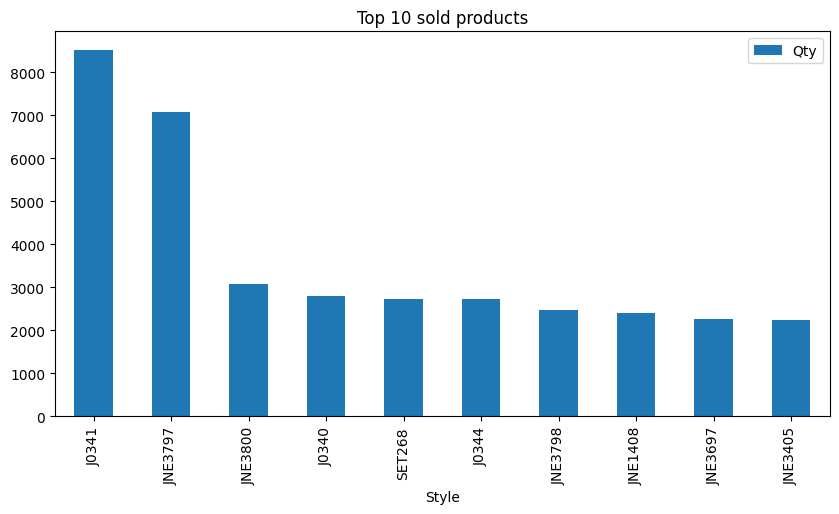

In [11]:
#Plot the top 10 most sold products
top10_sales.plot(kind='bar',title='Top 10 sold products', figsize=(10,5))

# 2. Get the top 10 returned products including their return quantity

In [12]:
#A sneak-peak into the returns sheet
returns.head()

,Date,Order ID,Portal,Style,SKU,Qty
0,2022-05-04,82f8a1bf-40b4-4180-a721-48fcd64b0f3f-14440,MYNTRAPPMP,JNE3661,JNE3661-TP-XXL,1
1,2022-06-14,406-1705895-4626713,Amazon TBS,M007,M007-SOLID-4PCS,1
2,2022-06-14,406-1705895-4626713,Amazon TBS,M008,M008-SOLID-4PCS,1
3,2022-04-01,51925322744,Snapdel TBS,J0117,J0117-TP-M,1
4,2022-04-01,51623762948,Snapdel TBS,SET287,SET287-KR-NP-S,1


In [13]:
#Find top 10 most returned products along with their Quantity
top10_returns = returns.groupby(['Style'])[['Qty']].sum().sort_values(['Qty'],ascending=False).head(10)

In [17]:
top10_returns

,Qty
Style,
JNE3797,1224
J0341,1159
J0344,875
JNE3800,662
SET345,608
SET268,602
JNE3160,558
JNE3798,520
J0230,491


<Axes: title={'center': 'Top 10 returned products'}, xlabel='Style'>

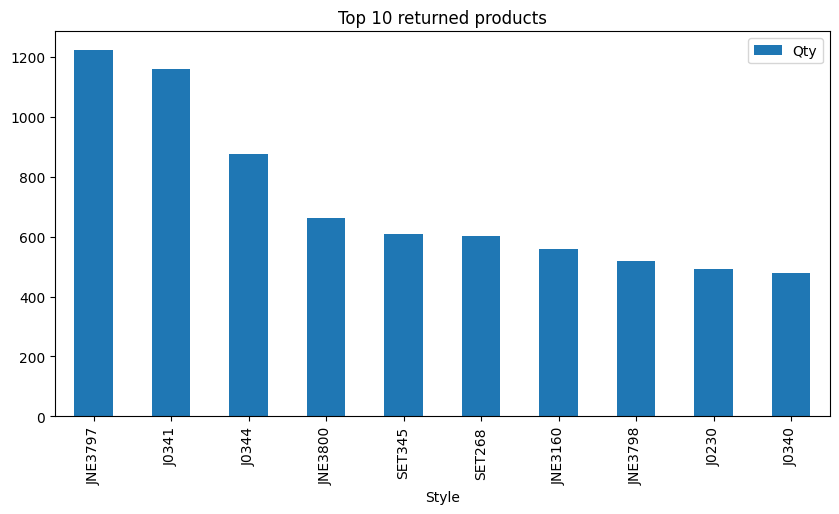

In [14]:
top10_returns.plot(kind='bar', title='Top 10 returned products', figsize=(10,5))

#3. Top 10 returned products by percentage

In [15]:
#Calculate total quantity returned for each Style
returned_products = returns.groupby('Style')['Qty'].sum().reset_index()

#Calculate total quantity sold for each Style
sold_products = sale.groupby('Style')['Qty'].sum().reset_index()

In [20]:
returned_products

,Style,Qty
0,AN201,3
1,AN202,4
2,AN203,10
3,AN204,1
4,AN205,1
...,...,...
1342,SET431,1
1343,SET433,26
1344,SET435,7
1345,SET436,11


In [21]:
sold_products

,Style,Qty
0,AN201,59
1,AN202,45
2,AN203,51
3,AN204,18
4,AN205,32
...,...,...
1542,SET445,4
1543,SET446,1
1544,SET449,7
1545,SET461,2


In [16]:
#Merge return and sold through Style
sold_vs_return = pd.merge(returned_products, sold_products, on='Style', how='left', suffixes=['_returned','_sold'])

In [17]:
sold_vs_return

,Style,Qty_returned,Qty_sold
0,AN201,3,59.0
1,AN202,4,45.0
2,AN203,10,51.0
3,AN204,1,18.0
4,AN205,1,32.0
...,...,...,...
1342,SET431,1,24.0
1343,SET433,26,224.0
1344,SET435,7,76.0
1345,SET436,11,170.0


In [18]:
#Calculate return percentage and round it off to 2 decimal places
sold_vs_return['Return_Percentage'] = (sold_vs_return['Qty_returned'] / sold_vs_return['Qty_sold']) * 100
sold_vs_return['Return_Percentage'] = sold_vs_return['Return_Percentage'].round(2)

In [21]:
sold_vs_return.sort_values(['Return_Percentage'], ascending=False).head(20)

#Problem : Return cannot exaggerate sales! Let's see what led to this..

,Style,Qty_returned,Qty_sold,Return_Percentage
358,J0315,3,2.0,150.00
63,BL081,4,3.0,133.33
1042,SAR050,1,1.0,100.00
322,J0264,1,1.0,100.00
1063,SAR101,2,2.0,100.00
40,BL031,2,2.0,100.00
1056,SAR092,5,5.0,100.00
334,J0287,1,1.0,100.00
323,J0265,2,2.0,100.00
1029,SAR033,8,9.0,88.89


In [ ]:
#We pick Style 'J0315' and 'BL081' and look for it in Sales dataframe
sale[(sale['Style']=='J0315') | (sale['Style']=='BL081')]

,Date,Order ID,Portal,Style,SKU,Qty,Unit Price,City,Shipping Provider,Sales
646,2022-04-01,d1eb57fb-c0b5-4e63-88ed-9b4ff7c0bb58-14440,MYNTRAPPMP,BL081,BL081-88PINK,1,478.10,Bikaner,ML,478.10
19231,2022-04-07,feb71ff2-795b-4f67-bf55-fec40d730814-14440,MYNTRAPPMP,BL081,BL081-88PINK,1,505.71,Kotdwar,ML,505.71
82540,2022-04-28,NYK-5818089-3560771-1-1,MPNYKAA_FASHION MP,J0315,J0315-KR-XL,1,1051.79,New Delhi,DelhiverySurface,1051.79
87013,2022-04-30,024c72f8-617b-4a41-9790-9894ba26113b-14440,MYNTRAPPMP,BL081,BL081-88PINK,1,505.71,Vijayawada,ML,505.71
203773,2022-06-12,NYK-6530085-4888509-3-1,MPNYKAA_FASHION MP,J0315,J0315-KR-XL,1,1051.79,Kolkata,DelhiverySurface,1051.79


In [ ]:
#We check for the same Styles in returns dataframe
returns[(returns['Style']=='J0315') | (returns['Style']=='BL081')]

,Date,Order ID,Portal,Style,SKU,Qty
1368,2022-04-04,0084873149S1,Lime Road TBS,BL081,BL081-88PINK,1
6524,2022-04-13,9c53d89f-3ff7-4ce1-a776-87d79f55f668-14440,MYNTRAPPMP,J0315,J0315-KR-XL,1
6720,2022-04-13,7935d914-876c-48ca-9a14-9a7b760ba91c-14440,MYNTRAPPMP,J0315,J0315-KR-L,1
18286,2022-04-30,f3719356-60bb-4ed7-9649-69fe463ce82a-14440,MYNTRAPPMP,BL081,BL081-88PINK,1
24966,2022-05-09,NYK-5818089-3560771-1-1,MPNYKAA_FASHION MP,J0315,J0315-KR-XL,1
25008,2022-05-09,feb71ff2-795b-4f67-bf55-fec40d730814-14440,MYNTRAPPMP,BL081,BL081-88PINK,1
42313,2022-06-07,d1eb57fb-c0b5-4e63-88ed-9b4ff7c0bb58-14440,MYNTRAPPMP,BL081,BL081-88PINK,1


In [114]:
#There is indeed a mismatch between sale and return of the said styles. Let's have a look in the master dataframe for same styles
master[(master['Design No.']=='J0315') | (master['Design No.']=='BL081')]

,SKU Code,Design No.,Stock,Category,Size,Color
125,BL081-88PINK,BL081,30,BLOUSE,FREE,Pink
2390,J0315-KR-L,J0315,2,KURTA,L,Grey
2391,J0315-KR-M,J0315,2,KURTA,M,Grey
2392,J0315-KR-S,J0315,1,KURTA,S,Grey
2393,J0315-KR-XL,J0315,3,KURTA,XL,Grey
2394,J0315-KR-XXL,J0315,6,KURTA,XXL,Grey


In [ ]:
#We conclude that sales entires from some Portals might  be missing in the sale dataframe.
#Hence, we will:
#1. drop the rows where sale quantity is NA
#2. drop the rows where return quantity is equal or more than sale quantity

In [22]:
#Drop rows where sale quantity is NA
sold_vs_return.drop(sold_vs_return[sold_vs_return['Qty_sold'].isna()].index, inplace=True)

In [23]:
#Drop the rows where return quantity is equal or more than sale quantity
sold_vs_return.drop(sold_vs_return[sold_vs_return['Qty_returned']>=sold_vs_return['Qty_sold']].index, inplace=True)

In [38]:
sold_vs_return.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1332 entries, 0 to 1346
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Style              1332 non-null   object 
 1   Qty_returned       1332 non-null   int64  
 2   Qty_sold           1332 non-null   float64
 3   Return_Percentage  1332 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 52.0+ KB


In [24]:
sold_vs_return

,Style,Qty_returned,Qty_sold,Return_Percentage
0,AN201,3,59.0,5.08
1,AN202,4,45.0,8.89
2,AN203,10,51.0,19.61
3,AN204,1,18.0,5.56
4,AN205,1,32.0,3.12
...,...,...,...,...
1342,SET431,1,24.0,4.17
1343,SET433,26,224.0,11.61
1344,SET435,7,76.0,9.21
1345,SET436,11,170.0,6.47


In [25]:
#After dropping those rows, we sort the dataframe once again
top10_returns_ratio = sold_vs_return.sort_values(['Return_Percentage'], ascending=False).head(10)

In [26]:
#Set style as index to make plotting easier
top10_returns_ratio.set_index('Style', inplace=True)

In [28]:
top10_returns_ratio

,Qty_returned,Qty_sold,Return_Percentage
Style,,,
SAR033,8,9.0,88.89
SAR136,8,9.0,88.89
BL020,9,11.0,81.82
SAR099,6,9.0,66.67
SAR039,2,3.0,66.67
JNE3390,8,12.0,66.67
J0263,2,3.0,66.67
J0286,2,3.0,66.67
J0322,2,3.0,66.67


<Axes: title={'center': 'Most returned products by percentage'}, xlabel='Style'>

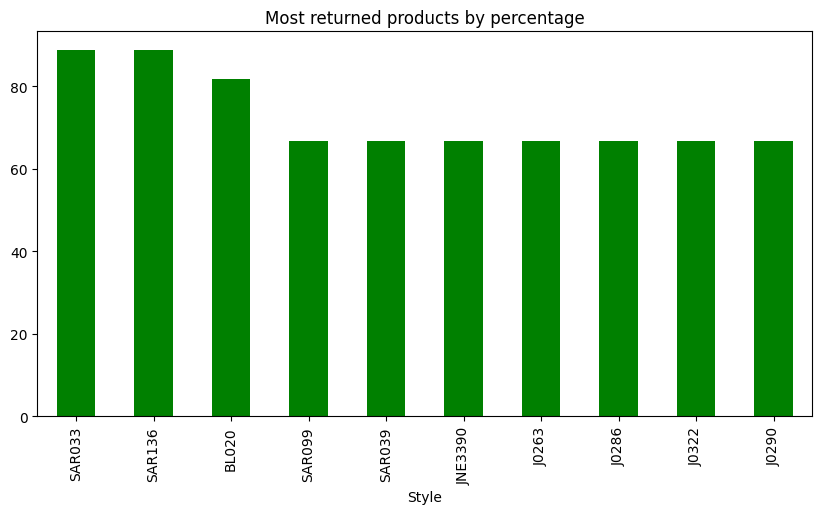

In [27]:
#Plot most Returned products by percentage
top10_returns_ratio['Return_Percentage'].plot(kind='bar', figsize=(10,5),title='Most returned products by percentage', color='green')

<Axes: title={'center': 'Most returned products by percentage'}, xlabel='Style'>

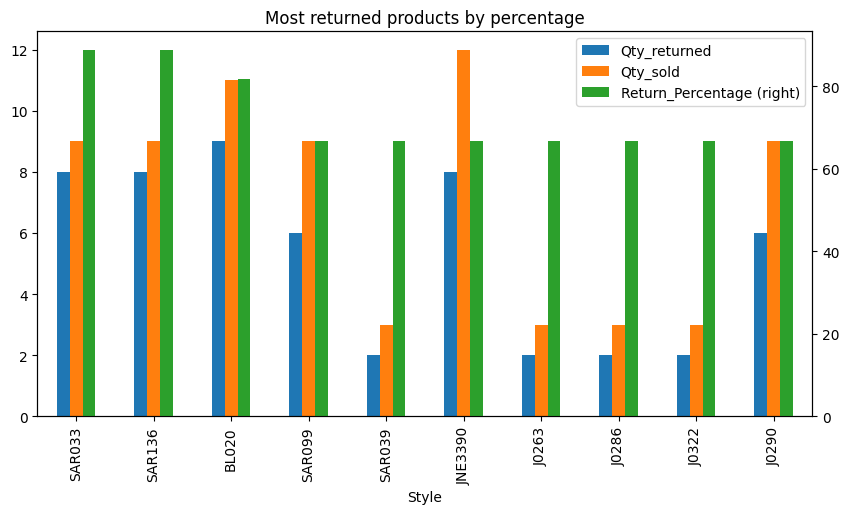

In [117]:
#Plot most Returned products by percentage(right y-axis) along with their sold and returned quantities (left y-axis)
top10_returns_ratio.plot(kind='bar', figsize=(10,5),title='Most returned products by percentage', secondary_y='Return_Percentage')

#4. What color is the most sold color

In [84]:
#We merge the sale sheet to master sheet on basis of SKU code to find the color from master sheet

color_merge = pd.merge(master[['SKU Code','Color']], sale, how='right', left_on='SKU Code', right_on='SKU')

In [124]:
color_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248696 entries, 0 to 248695
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   SKU Code           248288 non-null  object        
 1   Color              248288 non-null  object        
 2   Date               248696 non-null  datetime64[ns]
 3   Order ID           248696 non-null  object        
 4   Portal             248696 non-null  object        
 5   Style              248696 non-null  object        
 6   SKU                248696 non-null  object        
 7   Qty                248696 non-null  int64         
 8   Unit Price         248696 non-null  float64       
 9   City               248695 non-null  object        
 10  Shipping Provider  248261 non-null  object        
 11  Sales              248696 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 22.8+ MB


In [121]:
color_merge

,SKU Code,Color,Date,Order ID,Portal,Style,SKU,Qty,Unit Price,City,Shipping Provider,Sales
0,JNE2305-KR-533-XL,Light Brown,2022-04-01,51960721729,Snapdel TBS,JNE2305,JNE2305-KR-533-XL,1,438.10,Tura,DELHIVERY_ESSENTIAL,438.10
1,JNE2305-KR-533-XXL,Light Brown,2022-04-01,51961645447,Snapdel TBS,JNE2305,JNE2305-KR-533-XXL,1,438.10,Faridabad,LOGIX_FOX_LAAP,438.10
2,BL099-L,Black,2022-04-01,51961011403,Snapdel TBS,BL099,BL099-L,1,318.10,Amroha,EKART,318.10
3,SET156-KR-NP-XXXL,Yellow,2022-04-01,51961082119,Snapdel TBS,SET156,SET156-KR-NP-XXXL,1,1000.95,Jaipur,ONEWORLD_LAAP,1000.95
4,SET318-KR-SHA-M,Orange,2022-04-01,51961718111,Snapdel TBS,SET318,SET318-KR-SHA-M,1,1146.43,Nagpur,ELASTIC_RUN_LAAP,1146.43
...,...,...,...,...,...,...,...,...,...,...,...,...
248691,PJNE3068-KR-6XL,Black,2022-06-28,4322,SHOPIFY - Janasya.in (India),PJNE3068,PJNE3068-KR-6XL,1,1094.29,Mumbai,Shiprocket_1,1094.29
248692,PJNE2100-KR-6XL,Teal,2022-06-28,4322,SHOPIFY - Janasya.in (India),PJNE2100,PJNE2100-KR-6XL,1,808.57,Mumbai,Shiprocket_1,808.57
248693,JNE3760-KR-M,Teal,2022-06-28,M163641950,MIRRAW,JNE3760,JNE3760-KR-M,1,453.33,THANE,First Call,453.33
248694,JNE1525-KR-UDF19BLACK-XXL,Black,2022-06-28,M757117542,MIRRAW,JNE1525,JNE1525-KR-UDF19BLACK-XXL,1,375.24,Ottapalam,NaN,375.24


<Axes: title={'center': 'Most sold color'}, xlabel='Color'>

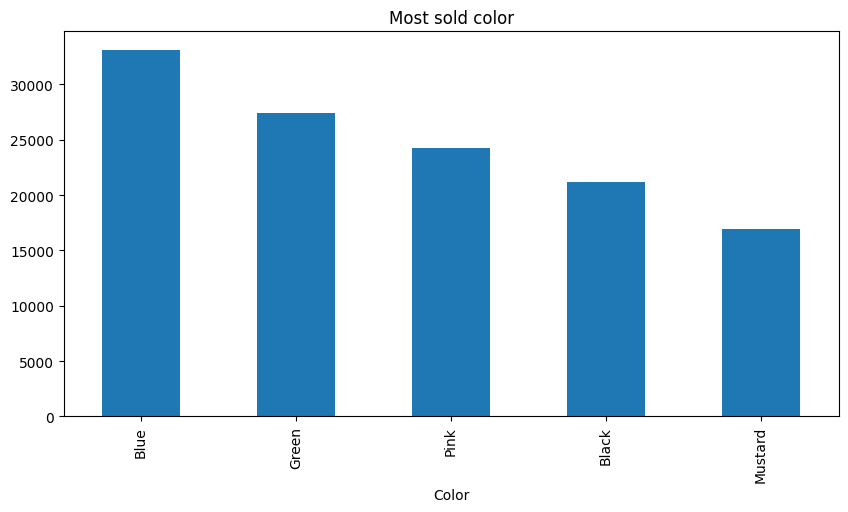

In [123]:
#Finding the top-most sold colors
color_merge.groupby('Color')['Qty'].sum().sort_values(ascending=False).head(5).plot(kind='bar', figsize=(10,5), title='Most sold color')

#Blue is the most sold color. However, this was when we looked for Color from Master file on basis of SKU code.
#As a bonus point, let us look what would happen if Color was merged from Master on basis of Style

In [130]:
master.head()

,SKU Code,Design No.,Stock,Category,Size,Color
0,AN201-RED-L,AN201,5,AN : LEGGINGS,L,Red
1,AN201-RED-M,AN201,5,AN : LEGGINGS,M,Red
2,AN201-RED-S,AN201,3,AN : LEGGINGS,S,Red
3,AN201-RED-XL,AN201,6,AN : LEGGINGS,XL,Red
4,AN201-RED-XXL,AN201,3,AN : LEGGINGS,XXL,Red


In [30]:
#Merge master and sale on basis of Style
color_merge_style = pd.merge(master[['Design No.','Color']], sale, how='right', left_on='Design No.', right_on='Style')

In [32]:
color_merge_style.groupby('Color')['Qty'].sum().sort_values(ascending=False).head(5)

#It is still Blue, which is the most sold color!

Color
Blue       229389
Green      185270
Pink       162607
Black      136792
Mustard    117363
Name: Qty, dtype: int64